## Importar librerías

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


## Cargar y explorar el dataset

In [2]:
# Cargamos el dataset desde Excel
df = pd.read_excel("dataset_spam_ham.xlsx", sheet_name="dataset_spam_ham")

# Mostramos las primeras filas para ver la estructura de los datos
df.head()


,ID,Mensaje,Longitud,%Mayusculas,%Digitos,Contiene_Link,Contiene_Oferta,Contiene_Dinero,Contiene_Urgente,Contiene_Saludo,Palabras_Tokenizadas,Clase
0,1,OFERTA EXCLUSIVA,16,9375,0,0,1,0,0,0,2,SPAM
1,2,URGENTE,7,1000,0,0,0,0,1,0,1,SPAM
2,3,PROMOCIÓN,9,1000,0,0,1,0,0,0,1,SPAM
3,4,PROMOCIÓN,9,1000,0,0,1,0,0,0,1,SPAM
4,5,PROMOCIÓN YA,12,9167,0,0,1,0,1,0,2,SPAM


## Selección de variables (features y target)

In [3]:
# Seleccionamos las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=["ID", "Mensaje", "Clase"])   # quitamos columnas que no son numéricas para el modelo
y = df["Clase"].map({"HAM":0, "SPAM":1})          # convertimos etiquetas en 0 (HAM) y 1 (SPAM)

# Mostramos dimensiones de los datos
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)


Shape de X: (1000, 9)
Shape de y: (1000,)


## División en entrenamiento y prueba

In [4]:
# Dividimos el dataset en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)


Tamaño de entrenamiento: (800, 9)
Tamaño de prueba: (200, 9)


## Entrenamiento con Regresión Lineal

In [5]:
# Creamos y entrenamos el modelo de Regresión Lineal
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# La regresión lineal devuelve valores continuos
y_pred_cont = linreg.predict(X_test)

# Convertimos a clases aplicando un umbral de 0.5
y_pred_lr = (y_pred_cont >= 0.5).astype(int)


## Entrenamiento con Regresión Logística

In [6]:
# Creamos y entrenamos el modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predicciones
y_pred_log = logreg.predict(X_test)


## Entrenamiento con Naive Bayes

In [7]:
# Creamos y entrenamos el modelo de Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predicciones
y_pred_nb = nb.predict(X_test)


## Función para evaluar modelos

In [8]:
# Función auxiliar para imprimir métricas
def evaluar(y_true, y_pred, modelo):
    print(f"--- {modelo} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precisión:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred))
    print()


## Evaluación de los tres modelos

In [9]:
# Evaluamos cada modelo
evaluar(y_test, y_pred_lr, "Regresión Lineal (umbral=0.5)")
evaluar(y_test, y_pred_log, "Regresión Logística")
evaluar(y_test, y_pred_nb, "Naive Bayes")


--- Regresión Lineal (umbral=0.5) ---
Accuracy : 1.0
Precisión: 1.0
Recall   : 1.0
F1 Score : 1.0
Matriz de confusión:
 [[100   0]
 [  0 100]]

--- Regresión Logística ---
Accuracy : 1.0
Precisión: 1.0
Recall   : 1.0
F1 Score : 1.0
Matriz de confusión:
 [[100   0]
 [  0 100]]

--- Naive Bayes ---
Accuracy : 1.0
Precisión: 1.0
Recall   : 1.0
F1 Score : 1.0
Matriz de confusión:
 [[100   0]
 [  0 100]]



## Importancia de variables

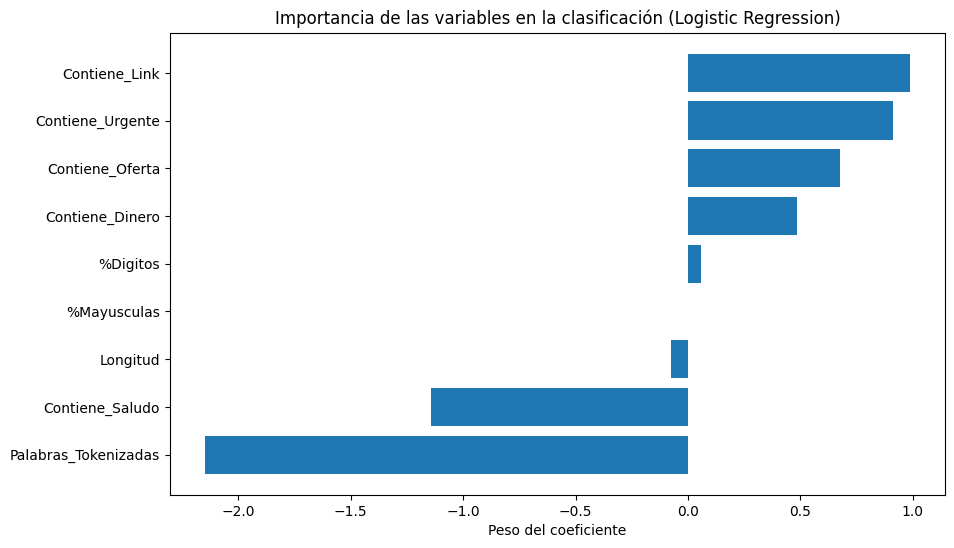

In [10]:
# Coeficientes de la Regresión Logística (más interpretables que los de la lineal)
import matplotlib.pyplot as plt

coefs = logreg.coef_[0]
features = X.columns

# Ordenamos por importancia
sorted_idx = np.argsort(coefs)
plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], coefs[sorted_idx])
plt.title("Importancia de las variables en la clasificación (Logistic Regression)")
plt.xlabel("Peso del coeficiente")
plt.show()
